In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["WORLD_SIZE"] = "1"

In [9]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipelineLegacy, DDIMScheduler, AutoencoderKL
from PIL import Image

from ip_adapter import IPAdapterPlus

In [10]:
# base_model_path = "runwayml/stable-diffusion-v1-5"
# base_model_path = "Lykon/dreamshaper-8"
vae_model_path = "stabilityai/sd-vae-ft-mse"
image_encoder_path = "models/image_encoder/"
device = "cuda"

In [11]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)

In [5]:
# load SD pipeline
# del pipe, ip_model
base_model_path="Lykon/AbsoluteReality"
torch.cuda.empty_cache()
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)

unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|██████████| 5/5 [00:10<00:00,  2.06s/it]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [9]:
# load ip-adapter
ip_ckpt = "models/ip_adapters/ip-adapter-plus-face_sd15.bin"
ip_model = IPAdapterPlus(pipe, image_encoder_path, ip_ckpt, device, num_tokens=16)

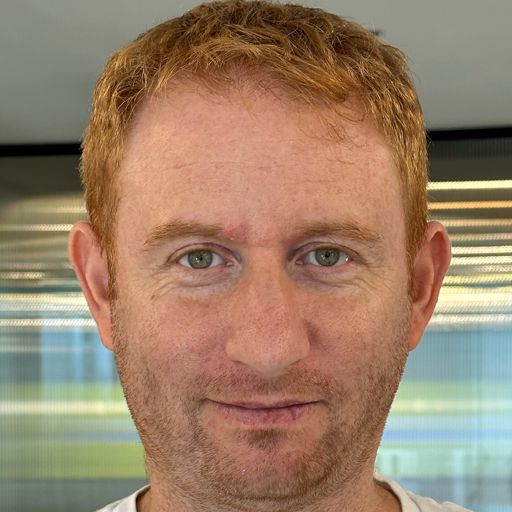

In [11]:
# read image prompt (face, here we use a ai-generation face)
image = Image.open("/fsx/homes/mshuvi/IP-Adapter/assets/my_imgs/amir_face2.jpg").convert("RGB")
#image.resize((288, 512))  imri
image.resize((512, 512))  

In [13]:
# Save identity images
seeds = range(1,400)
for seed in seeds:
    images = ip_model.generate(prompt=None, negative_prompt=None, 
                           pil_image=image, num_samples=1, height=512, width=512,
                           num_inference_steps=40, seed=seed, scale=1.0)
    
    images[0].save(f"amir_face/{seed:05d}.jpg")

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:01<00:00, 27.22it/s]


In [ ]:
prompt=[
    "An illustration of a smiling man with a perfect skin, beautiful face, dressed in a luxurious, fur coat and a stylish hat with pompom in a snowy mountain, a flying snowball to his face, fluffy snow flakes falling, gloved hands, bright contrast light, detailed, 8k, classical, highly detailed",
    "A cartoon 3d, small plastic 3d doll, wearing a pink chef's hat and apron as a chef, " +
    "standing in silver/pink toy kitchen background, cartoon style, 3d, happy face, dreamlike, fantasy",
        "A 3d photo of a pretty, perfect face, elegant, highly detailed, as a judge wearing a judge's robe, sitting in court, serious face, concept art, sharp focus, illustration, 8k, cartoon style",
"A 3d cartoon of a plastic doll wearing pink cowboy outfit, sitting on a white horse, holding rains, insanely detailed and intricate, smooth face, nice even light, hyper detailed, rodeo background, octane render style, volumetric lighting, 8k post-production",
"A painting, wearing a golden shirt and golden bathrobe above, smooth skin, slightly smiling, a bathroom with expensive tiles and dЋcor on background, ultra detailed, 16k resolution, beautiful image, amazing effect, chic, gloss",
"smiling, smooth skin, Roman style, empty hands, in an elegant, mantle, victorian era clothing, clothing light-colored handle, high-necked gown with intricate embroidery, blooming garden in the background, bright eyes detail, 8k, intricate face detail, digital painting, deviant art"
]

In [ ]:
neg = "deformed iris, big breasts, closed eyes, deformed, distorted, disfigured, poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, mutated hands and fingers, disconnected limbs, mutation, mutated, nudes, nude breasts, ugly, disgusting, blurry, amputation, unclear bindi, pottu, extra fingers"
# prompt_ = "(anime coloring, anime screencap, ghibli, mappa, anime style), 1girl, hatsune miku, white gown, angel, angel wings, golden halo, dark background, upper body, (closed mouth:1.2), looking at viewer, arms behind back, blue theme, stars, starry night"
# prompt_ = "cgmech, (realistic) solo, white mecha robot, cape, science fiction, torn clothes, glowing, standing, robot joints, mecha, armor, cowboy shot, (floating cape), intense sunlight, silver dragonborn, outdoors, landscape, nature, ((masterpiece, best quality)), volumetrics dtx, (film grain, blurry background, blurry foreground, bokeh, depth of field, motion blur:1.3)"
# prompt_ = "black humanoid made of rock, upper body, barechested, ((masterpiece, best quality)), cracked skin, white electricity coming through cracks, muscular male, (dragonborn:0.6), white hair, outdoors, detailed background, depth of field"
# prompt_ = "(8k, best quality, masterpiece:1.2),(best quality:1.0), (ultra highres:1.0), watercolor, a beautiful woman, shoulder, hair ribbons, by agnes cecile, half body portrait, extremely luminous bright design, pastel colors, (ink:1.3), autumn lights"
# prompt_ = "portrait, action pose, slow motion, human wizard wearing yellow and black robes (majestic evoker cloth armor:1.2), (archmage robes, runic patterns:1.2), (insanely detailed, bloom:1.5), (analog:1.2), (high sharpness), (detailed pupils:1.1), (painting:1.1), (digital painting:1), detailed face and eyes, Masterpiece, best quality, (highly detailed photo:1.1), 8k, photorealistic, very long straight white and grey hair, grey streaks, ecstatic, sharp, stocky, realistic, real shadow 3d, (highest quality), (concept art, 4k), (wizard labratory in backgound:1.2), by Michelangelo and Alessandro Casagrande and Greg Rutkowski and Sally Mann and jeremy mann and sandra chevrier and maciej kuciara,"
# prompt_ = "Vampire Queen, (8k, best quality, masterpiece:1.2),(best quality:1.0), (ultra highres:1.0),backlit, intricate details, highly detailed, slate atmosphere, cinematic, dimmed colors, dark shot, muted colors, film grain, lut, spooky, depth blur, blurry background dof, bokeh, realistic, realistic skin"
prompt_ = "(Ancient elven girl goddess of the hunt), (((masterpiece))), big crown on the head, (golden elven crown on the head with diamonds), beautiful elf ears, (((beautiful rings in the ears))),(beautiful eyes), (beautiful head, (((beautiful face))), (beautiful portrait:1.5), (((beautiful photo))), (((RAW photo))), (best quality),(realistic:1.5), (photo-realistic:1.3), (extremely delicate and beautiful:1.1),(((Amazing))), finely detail, ultra-detailed, best illustration, (best shadow), extremely intricate,(exquisitely detailed skin), cinematic light, perfect anatomy, (coolcolor:1.4), sharp focus, volumetric fog, 8k UHD, DSLR, high quality, (((high image quality))), (correct eye anatomy), good body anatomy,"
# images = ip_model.generate(prompt=prompt_, negative_prompt=neg, 
#                            pil_image=image, num_samples=4, height=768, width=512,
#                            num_inference_steps=20, seed=42, scale=0.7)
# grid = image_grid(images, 1, 4)
# grid

In [ ]:
prompt_=""
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42,scale=0.8,
        prompt=None, negative_prompt=neg)
grid = image_grid(images, 1, 4)
grid

In [ ]:
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42,
        prompt="photo of a girl wearing a red dress and smiles")
grid = image_grid(images, 1, 4)
grid

In [ ]:
# Change to a anime model
# del pipe, ip_model
torch.cuda.empty_cache()
base_model_path="Lykon/AbsoluteReality"
# base_model_path="SG161222/Realistic_Vision_V5.1_noVAE"
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)


In [ ]:
# load ip-adapter
ip_ckpt = "models/ip-adapter-plus-face_sd15.bin"
ip_model = IPAdapterPlus(pipe, image_encoder_path, ip_ckpt, device, num_tokens=16)

In [1]:
from deepface import DeepFace

2023-10-03 08:36:35.409852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 08:36:39.085586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [59]:
path1 = '/fsx/homes/mshuvi/IP-Adapter/maayan_face_aligned/0.jpg'
path2 = '/fsx/homes/mshuvi/IP-Adapter/assets/my_imgs/maayan_face.jpg'
result = DeepFace.verify(img1_path = path1, img2_path = path2, model_name = "Facenet512", normalization = "base")
print(result)

Corrupt JPEG data: premature end of data segment


{'verified': False, 'distance': 0.41648730460406935, 'threshold': 0.3, 'model': 'Facenet512', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 157, 'y': 185, 'w': 528, 'h': 528}, 'img2': {'x': 154, 'y': 187, 'w': 534, 'h': 534}}, 'time': 0.41}


In [60]:
path1 = '/fsx/homes/mshuvi/IP-Adapter/maayan_face_aligned/0.jpg'
path2 = '/fsx/homes/mshuvi/IP-Adapter/maayan_face_aligned/1.jpg'
result = DeepFace.verify(img1_path = path1, img2_path = path2, model_name = "Facenet512", normalization = "base")
print(result)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


{'verified': True, 'distance': 0.08047489736836666, 'threshold': 0.3, 'model': 'Facenet512', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 157, 'y': 185, 'w': 528, 'h': 528}, 'img2': {'x': 169, 'y': 196, 'w': 507, 'h': 507}}, 'time': 0.4}


In [64]:
path1 = '/fsx/homes/mshuvi/IP-Adapter/maayan_face/00001.jpg'
path2 = '/fsx/homes/mshuvi/IP-Adapter/assets/my_imgs/maayan_face.jpg'
result = DeepFace.verify(img1_path = path1, img2_path = path2, model_name = "Facenet512", normalization = "base")
print(result)

{'verified': False, 'distance': 0.39834114972793466, 'threshold': 0.3, 'model': 'Facenet512', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 164, 'y': 72, 'w': 156, 'h': 156}, 'img2': {'x': 154, 'y': 187, 'w': 534, 'h': 534}}, 'time': 0.33}


In [61]:
path1 = '/fsx/homes/mshuvi/IP-Adapter/maayan_face/00001.jpg'
path2 = '/fsx/homes/mshuvi/IP-Adapter/assets/my_imgs/maayan_face.jpg'
result = DeepFace.verify(img1_path = path1, img2_path = path2, model_name = "Facenet512", normalization = "base")
print(result)

{'verified': False, 'distance': 0.39834114972793466, 'threshold': 0.3, 'model': 'Facenet512', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 164, 'y': 72, 'w': 156, 'h': 156}, 'img2': {'x': 154, 'y': 187, 'w': 534, 'h': 534}}, 'time': 0.34}


In [51]:
result_norm = DeepFace.find(img_path = "/fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cropped-aligned/0.jpg",
                       db_path = "/fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cropped-aligned", normalization = "base",
                       model_name = "Facenet512")

There are  27  representations found in  representations_facenet512.pkl


find function lasts  1.6011512279510498  seconds


In [52]:
result_norm[0]

identity  source_x  source_y  \
0   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
1   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
2   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
3   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
4   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
5   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
6   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
7   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
8   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
9   /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
10  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
11  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
12  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
13  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
14  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
15  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
16  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
17  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
18  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
19  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
20  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
21  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
22  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
23  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   
24  /fsx/homes/mshuvi/IP-Adapter/assets/Maayan-cro...       165       196   

    source_w  source_h  Facenet512_cosine  
0        523       523      -2.220446e-16  
1        523       523       3.336046e-02  
2        523       523       4.111483e-02  
3        523       523       4.947709e-02  
4        523       523       5.292480e-02  
5        523       523       5.478725e-02  
6        523       523       5.498430e-02  
7        523       523       5.622649e-02  
8        523       523       7.224030e-02  
9        523       523       7.665481e-02  
10       523       523       7.832567e-02  
11       523       523       7.892054e-02  
12       523       523       8.010090e-02  
13       523       523       8.027207e-02  
14       523       523       8.440914e-02  
15       523       523       8.991199e-02  
16       523       523       9.202240e-02  
17       523       523       9.352100e-02  
18       523       523       9.704783e-02  
19       523       523       9.880954e-02  
20       523       523       1.041398e-01  
21       523       523       1.106095e-01  
22       523       523       1.168876e-01  
23       523       523       1.561320e-01  
24       523       523       2.210445e-01

In [49]:
kk = [f.split('/')[-1] for f in result[0].loc[:,"identity"]]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 kk = [f.split('/')[-1] for f in result[0].loc[:,"identity"]]                                 │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 0

In [46]:
sorted(kk)

['0.jpg',
 '1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '9.jpg']

In [50]:
result

{'verified': True,
 'distance': 0.1303248308432805,
 'threshold': 0.3,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 165, 'y': 196, 'w': 523, 'h': 523},
  'img2': {'x': 160, 'y': 189, 'w': 523, 'h': 523}},
 'time': 0.42}

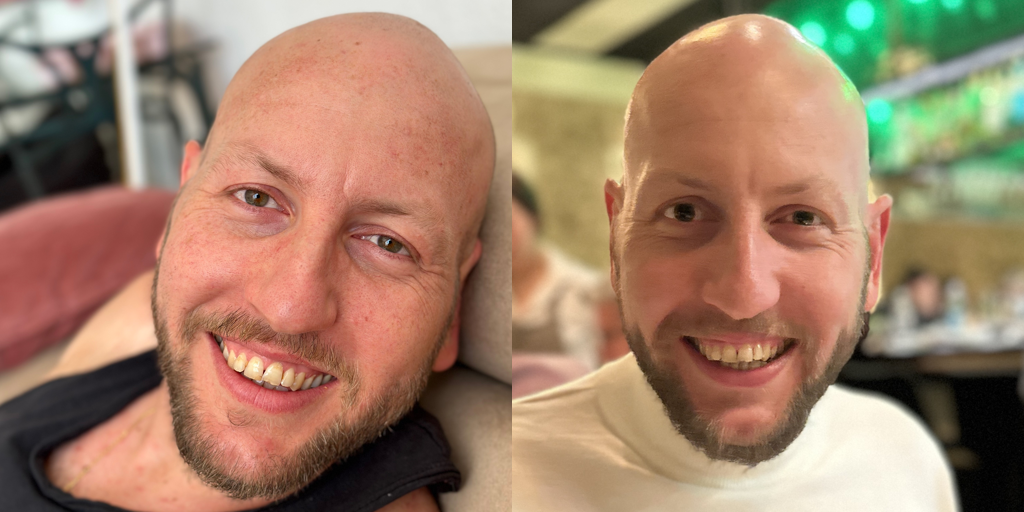

In [15]:
from PIL import Image
image1 = Image.open(path1).convert("RGB").resize((512,512))
image2 = Image.open(path2).convert("RGB").resize((512,512))
grid = image_grid([image1, image2], 1, 2)
grid

In [ ]:
# prompt_ = "extremely intricate, (realistic), photo of a person in a bustling metropolis, weaving through crowded streets and dark alleyways, close up, Detailed clothes, determined expression, shiny glossy skin, subsurface scattering, (sharp:0.7), colorful explosion psychedelic paint colors, amazing fine detail, Nikon D850 film stock photograph Kodak Portra 400 camera f1.6 lens, rich colors, lifelike texture, dramatic lighting, urban environment, skyscrapers, neon signs, street vendors, dynamic composition, unreal engine, trending on ArtStation, cinestill 800 tungsten, volumetrics dtx, film grain, blurry background, blurry foreground, bokeh, depth of field, motion blur"
# prompt_ = "(extremely intricate:1.3), (realistic), photo of a girl in a bustling metropolis, weaving through crowded streets and dark alleyways, close up, Detailed clothes, green eyes, flowing hair, determined expression, shiny glossy skin, subsurface scattering, (sharp:0.7), [(colorful explosion psychedelic paint colors:1.21)::0.05], amazing fine detail, Nikon D850 film stock photograph Kodak Portra 400 camera f1.6 lens, rich colors, lifelike texture, dramatic lighting, urban environment, skyscrapers, neon signs, street vendors, dynamic composition, unreal engine, trending on ArtStation, cinestill 800 tungsten, volumetrics dtx, (film grain, blurry background, blurry foreground, bokeh, depth of field, motion blur:1.3)<lora:more_details:0.6>"

images = ip_model.generate(prompt=None, negative_prompt=neg, 
                           pil_image=image, num_samples=4, height=512, width=512,
                           num_inference_steps=40, seed=42, scale=1.0, guidance_scale=5)
grid = image_grid(images, 1, 4)
grid

In [ ]:
images[0].save('/fsx/homes/mshuvi/IP-Adapter/kobi_face/seed42.jpg')

In [ ]:
seed=42
print(f"kobi_face/{seed:05d}")

In [ ]:
prompt_ = "A photo of a face, best quality, high resolution"
neg = "bad quality, low resolution"
# neg = "deformed iris, big breasts, closed eyes, deformed, distorted, disfigured, poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, mutated hands and fingers, disconnected limbs, mutation, mutated, nudes, nude breasts, ugly, disgusting, blurry, amputation, unclear bindi, pottu, extra fingers"

images = ip_model.generate(prompt=prompt_, negative_prompt=neg, 
                           pil_image=image, num_samples=4, height=512, width=512,
                           num_inference_steps=20, seed=42, scale=1.0)
grid = image_grid(images, 1, 4)
grid